In [1]:
import warnings
# Ignore the "deprecated" warning category
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
df = pd.read_csv("Property_Tax.csv")

In [5]:
#df = pd.read_csv("/content/drive/MyDrive/Colab files/Property_Tax.csv")

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Columns: 139 entries, PARID to CURTAXFLAG
dtypes: float64(25), int64(81), object(33)
memory usage: 1.1+ GB


In [8]:
df.head()

,PARID,BORO,BLOCK,LOT,EASEMENT,SUBIDENT-REUC,RECTYPE,YEAR,IDENT,SUBIDENT,...,STORAGE_AREA_GROSS,GARAGE_AREA,OTHER_AREA_GROSS,REUC_DESCRIPTION,EXTRACRDT,PYTAXFLAG,TENTAXFLAG,CBNTAXFLAG,FINTAXFLAG,CURTAXFLAG
0,1726130011 50,1,72613,11,NaN,50,3,2025,A2613,50,...,0,0,0,11-13 AVENUE D,1/8/2024,T,T,A,A,T
1,1726130011 500,1,72613,11,NaN,500,3,2025,A2613,500,...,0,0,0,NaN,1/8/2024,T,T,A,A,T
2,1726130011 502,1,72613,11,NaN,502,3,2025,A2613,502,...,0,0,0,NaN,1/8/2024,T,T,A,A,T
3,1726130011 503,1,72613,11,NaN,503,3,2025,A2613,503,...,0,0,0,NaN,1/8/2024,T,T,A,A,T
4,1726130011 504,1,72613,11,NaN,504,3,2025,A2613,504,...,0,0,0,NaN,1/8/2024,T,T,A,A,T


In [9]:
df['CURTAXCLASS'].value_counts()

,count
CURTAXCLASS,
2,845603
4,162105
1,37491
3,3376


## Handling Columns to be dropped based on dictionary

In [10]:
cols = df.columns[8:56]
cols

Index(['IDENT', 'SUBIDENT', 'ROLL_SECTION', 'SECVOL', 'PYMKTLAND', 'PYMKTTOT',
       'PYACTLAND', 'PYACTTOT', 'PYACTEXTOT', 'PYTRNLAND', 'PYTRNTOT',
       'PYTRNEXTOT', 'PYTXBTOT', 'PYTXBEXTOT', 'PYTAXCLASS', 'TENMKTLAND',
       'TENMKTTOT', 'TENACTLAND', 'TENACTTOT', 'TENACTEXTOT', 'TENTRNLAND',
       'TENTRNTOT', 'TENTRNEXTOT', 'TENTXBTOT', 'TENTXBEXTOT', 'TENTAXCLASS',
       'CBNMKTLAND', 'CBNMKTTOT', 'CBNACTLAND', 'CBNACTTOT', 'CBNACTEXTOT',
       'CBNTRNLAND', 'CBNTRNTOT', 'CBNTRNEXTOT', 'CBNTXBTOT', 'CBNTXBEXTOT',
       'CBNTAXCLASS', 'FINMKTLAND', 'FINMKTTOT', 'FINACTLAND', 'FINACTTOT',
       'FINACTEXTOT', 'FINTRNLAND', 'FINTRNTOT', 'FINTRNEXTOT', 'FINTXBTOT',
       'FINTXBEXTOT', 'FINTAXCLASS'],
      dtype='object')

In [11]:
df.drop(cols, inplace=True, axis=1)

In [12]:
df.drop(['PARID','BLOCK','SUBIDENT-REUC','PERIOD'], inplace=True, axis=1)
df.columns

Index(['BORO', 'LOT', 'EASEMENT', 'RECTYPE', 'YEAR', 'CURMKTLAND', 'CURMKTTOT',
       'CURACTLAND', 'CURACTTOT', 'CURACTEXTOT', 'CURTRNLAND', 'CURTRNTOT',
       'CURTRNEXTOT', 'CURTXBTOT', 'CURTXBEXTOT', 'CURTAXCLASS', 'NEWDROP',
       'NOAV', 'VALREF', 'BLDG_CLASS', 'OWNER', 'ZONING', 'HOUSENUM_LO',
       'HOUSENUM_HI', 'STREET_NAME', 'ZIP_CODE', 'GEPSUPPORT_RC', 'STCODE',
       'LOT_FRT', 'LOT_DEP', 'LOT_IRREG', 'BLD_FRT', 'BLD_DEP', 'BLD_EXT',
       'BLD_STORY', 'CORNER', 'LAND_AREA', 'NUM_BLDGS', 'YRBUILT',
       'YRBUILT_RANGE', 'YRBUILT_FLAG', 'YRALT1', 'YRALT1_RANGE', 'YRALT2',
       'YRALT2_RANGE', 'COOP_APTS', 'UNITS', 'REUC_REF', 'APTNO', 'COOP_NUM',
       'CPB_BORO', 'CPB_DIST', 'APPT_DATE', 'APPT_BORO', 'APPT_BLOCK',
       'APPT_LOT', 'APPT_EASE', 'CONDO_Number', 'CONDO_SFX1', 'CONDO_SFX2',
       'CONDO_SFX3', 'UAF_LAND', 'UAF_BLDG', 'PROTEST_1', 'PROTEST_2',
       'PROTEST_OLD', 'ATTORNEY_GROUP1', 'ATTORNEY_GROUP2',
       'ATTORNEY_GROUP_OLD', 'GROSS_SQFT', 'H

In [13]:
df.drop(df.columns[39:46], inplace=True, axis=1)
df.columns

Index(['BORO', 'LOT', 'EASEMENT', 'RECTYPE', 'YEAR', 'CURMKTLAND', 'CURMKTTOT',
       'CURACTLAND', 'CURACTTOT', 'CURACTEXTOT', 'CURTRNLAND', 'CURTRNTOT',
       'CURTRNEXTOT', 'CURTXBTOT', 'CURTXBEXTOT', 'CURTAXCLASS', 'NEWDROP',
       'NOAV', 'VALREF', 'BLDG_CLASS', 'OWNER', 'ZONING', 'HOUSENUM_LO',
       'HOUSENUM_HI', 'STREET_NAME', 'ZIP_CODE', 'GEPSUPPORT_RC', 'STCODE',
       'LOT_FRT', 'LOT_DEP', 'LOT_IRREG', 'BLD_FRT', 'BLD_DEP', 'BLD_EXT',
       'BLD_STORY', 'CORNER', 'LAND_AREA', 'NUM_BLDGS', 'YRBUILT', 'UNITS',
       'REUC_REF', 'APTNO', 'COOP_NUM', 'CPB_BORO', 'CPB_DIST', 'APPT_DATE',
       'APPT_BORO', 'APPT_BLOCK', 'APPT_LOT', 'APPT_EASE', 'CONDO_Number',
       'CONDO_SFX1', 'CONDO_SFX2', 'CONDO_SFX3', 'UAF_LAND', 'UAF_BLDG',
       'PROTEST_1', 'PROTEST_2', 'PROTEST_OLD', 'ATTORNEY_GROUP1',
       'ATTORNEY_GROUP2', 'ATTORNEY_GROUP_OLD', 'GROSS_SQFT',
       'HOTEL_AREA_GROSS', 'OFFICE_AREA_GROSS', 'RESIDENTIAL_AREA_GROSS',
       'RETAIL_AREA_GROSS', 'LOFT_AREA_G

In [14]:
cols = df.columns[40:51]
cols

Index(['REUC_REF', 'APTNO', 'COOP_NUM', 'CPB_BORO', 'CPB_DIST', 'APPT_DATE',
       'APPT_BORO', 'APPT_BLOCK', 'APPT_LOT', 'APPT_EASE', 'CONDO_Number'],
      dtype='object')

In [15]:
df.drop(cols, inplace=True, axis=1)
df.columns

Index(['BORO', 'LOT', 'EASEMENT', 'RECTYPE', 'YEAR', 'CURMKTLAND', 'CURMKTTOT',
       'CURACTLAND', 'CURACTTOT', 'CURACTEXTOT', 'CURTRNLAND', 'CURTRNTOT',
       'CURTRNEXTOT', 'CURTXBTOT', 'CURTXBEXTOT', 'CURTAXCLASS', 'NEWDROP',
       'NOAV', 'VALREF', 'BLDG_CLASS', 'OWNER', 'ZONING', 'HOUSENUM_LO',
       'HOUSENUM_HI', 'STREET_NAME', 'ZIP_CODE', 'GEPSUPPORT_RC', 'STCODE',
       'LOT_FRT', 'LOT_DEP', 'LOT_IRREG', 'BLD_FRT', 'BLD_DEP', 'BLD_EXT',
       'BLD_STORY', 'CORNER', 'LAND_AREA', 'NUM_BLDGS', 'YRBUILT', 'UNITS',
       'CONDO_SFX1', 'CONDO_SFX2', 'CONDO_SFX3', 'UAF_LAND', 'UAF_BLDG',
       'PROTEST_1', 'PROTEST_2', 'PROTEST_OLD', 'ATTORNEY_GROUP1',
       'ATTORNEY_GROUP2', 'ATTORNEY_GROUP_OLD', 'GROSS_SQFT',
       'HOTEL_AREA_GROSS', 'OFFICE_AREA_GROSS', 'RESIDENTIAL_AREA_GROSS',
       'RETAIL_AREA_GROSS', 'LOFT_AREA_GROSS', 'FACTORY_AREA_GROSS',
       'WAREHOUSE_AREA_GROSS', 'STORAGE_AREA_GROSS', 'GARAGE_AREA',
       'OTHER_AREA_GROSS', 'REUC_DESCRIPTION', 'EXTRACR

In [16]:
df.drop(df.columns[45:51], inplace=True, axis=1)
df.columns

Index(['BORO', 'LOT', 'EASEMENT', 'RECTYPE', 'YEAR', 'CURMKTLAND', 'CURMKTTOT',
       'CURACTLAND', 'CURACTTOT', 'CURACTEXTOT', 'CURTRNLAND', 'CURTRNTOT',
       'CURTRNEXTOT', 'CURTXBTOT', 'CURTXBEXTOT', 'CURTAXCLASS', 'NEWDROP',
       'NOAV', 'VALREF', 'BLDG_CLASS', 'OWNER', 'ZONING', 'HOUSENUM_LO',
       'HOUSENUM_HI', 'STREET_NAME', 'ZIP_CODE', 'GEPSUPPORT_RC', 'STCODE',
       'LOT_FRT', 'LOT_DEP', 'LOT_IRREG', 'BLD_FRT', 'BLD_DEP', 'BLD_EXT',
       'BLD_STORY', 'CORNER', 'LAND_AREA', 'NUM_BLDGS', 'YRBUILT', 'UNITS',
       'CONDO_SFX1', 'CONDO_SFX2', 'CONDO_SFX3', 'UAF_LAND', 'UAF_BLDG',
       'GROSS_SQFT', 'HOTEL_AREA_GROSS', 'OFFICE_AREA_GROSS',
       'RESIDENTIAL_AREA_GROSS', 'RETAIL_AREA_GROSS', 'LOFT_AREA_GROSS',
       'FACTORY_AREA_GROSS', 'WAREHOUSE_AREA_GROSS', 'STORAGE_AREA_GROSS',
       'GARAGE_AREA', 'OTHER_AREA_GROSS', 'REUC_DESCRIPTION', 'EXTRACRDT',
       'PYTAXFLAG', 'TENTAXFLAG', 'CBNTAXFLAG', 'FINTAXFLAG', 'CURTAXFLAG'],
      dtype='object')

In [17]:
df.drop(df.columns[46:62], inplace=True, axis=1)
df.drop('CONDO_SFX3',inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 46 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   BORO           1048575 non-null  int64  
 1   LOT            1048575 non-null  int64  
 2   EASEMENT       2117 non-null     object 
 3   RECTYPE        1048575 non-null  int64  
 4   YEAR           1048575 non-null  int64  
 5   CURMKTLAND     1048575 non-null  int64  
 6   CURMKTTOT      1048575 non-null  int64  
 7   CURACTLAND     1048575 non-null  int64  
 8   CURACTTOT      1048575 non-null  int64  
 9   CURACTEXTOT    1048575 non-null  int64  
 10  CURTRNLAND     1048575 non-null  int64  
 11  CURTRNTOT      1048575 non-null  int64  
 12  CURTRNEXTOT    1048575 non-null  int64  
 13  CURTXBTOT      1048575 non-null  int64  
 14  CURTXBEXTOT    1048575 non-null  int64  
 15  CURTAXCLASS    1048575 non-null  int64  
 16  NEWDROP        1033620 non-null  float64
 17  NOAV    

In [18]:
df.drop(['RECTYPE','OWNER','STCODE'], inplace=True, axis=1)

## Data Preparation - Imputation

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 43 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   BORO           1048575 non-null  int64  
 1   LOT            1048575 non-null  int64  
 2   EASEMENT       2117 non-null     object 
 3   YEAR           1048575 non-null  int64  
 4   CURMKTLAND     1048575 non-null  int64  
 5   CURMKTTOT      1048575 non-null  int64  
 6   CURACTLAND     1048575 non-null  int64  
 7   CURACTTOT      1048575 non-null  int64  
 8   CURACTEXTOT    1048575 non-null  int64  
 9   CURTRNLAND     1048575 non-null  int64  
 10  CURTRNTOT      1048575 non-null  int64  
 11  CURTRNEXTOT    1048575 non-null  int64  
 12  CURTXBTOT      1048575 non-null  int64  
 13  CURTXBEXTOT    1048575 non-null  int64  
 14  CURTAXCLASS    1048575 non-null  int64  
 15  NEWDROP        1033620 non-null  float64
 16  NOAV           1048517 non-null  object 
 17  VALREF  

In [20]:
df.isna().sum().sum()

np.int64(3889878)

In [21]:
df.iloc[:, 5:16].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,CURMKTTOT,CURACTLAND,CURACTTOT,CURACTEXTOT,CURTRNLAND,CURTRNTOT,CURTRNEXTOT,CURTXBTOT,CURTXBEXTOT,CURTAXCLASS,NEWDROP
count,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1033620.00000
mean,3580025.98175,319072.08216,1516468.94820,410904.18335,302925.94430,1435497.58425,404216.77122,1414580.68623,409443.26982,2.27666,0.00774
std,37486225.81421,7308652.68353,16859749.79064,11132939.96958,7306875.80620,16881235.14359,11251951.99136,16701524.44374,11131092.72079,0.76211,0.08764
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
25%,224230.50000,12200.00000,100182.00000,0.00000,11562.00000,92574.00000,0.00000,91831.00000,0.00000,2.00000,0.00000
50%,408106.00000,25484.00000,177708.00000,0.00000,23782.00000,162874.00000,0.00000,162217.00000,0.00000,2.00000,0.00000
75%,1201000.00000,80001.00000,456643.00000,0.00000,66705.00000,380237.50000,0.00000,377980.00000,0.00000,2.00000,0.00000
max,9660146136.00000,2855117700.00000,4347065761.00000,3296988450.00000,2855117700.00000,4347065761.00000,3390948900.00000,4347065761.00000,3296988450.00000,4.00000,1.00000


In [22]:
df["YRBUILT"].describe().apply(lambda x: format(x, 'f'))

,YRBUILT
count,1048575.000000
mean,1532.454666
std,809.237683
min,0.000000
25%,1900.000000
50%,1928.000000
75%,1988.000000
max,2024.000000


In [23]:
df = df[df['YRBUILT'] >= 1900]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800133 entries, 33 to 1048574
Data columns (total 43 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   BORO           800133 non-null  int64  
 1   LOT            800133 non-null  int64  
 2   EASEMENT       0 non-null       object 
 3   YEAR           800133 non-null  int64  
 4   CURMKTLAND     800133 non-null  int64  
 5   CURMKTTOT      800133 non-null  int64  
 6   CURACTLAND     800133 non-null  int64  
 7   CURACTTOT      800133 non-null  int64  
 8   CURACTEXTOT    800133 non-null  int64  
 9   CURTRNLAND     800133 non-null  int64  
 10  CURTRNTOT      800133 non-null  int64  
 11  CURTRNEXTOT    800133 non-null  int64  
 12  CURTXBTOT      800133 non-null  int64  
 13  CURTXBEXTOT    800133 non-null  int64  
 14  CURTAXCLASS    800133 non-null  int64  
 15  NEWDROP        800104 non-null  float64
 16  NOAV           800076 non-null  object 
 17  VALREF         29 non-null      

In [24]:
# Dropping the column as there are many missing values
df.drop(['VALREF','EASEMENT'], inplace=True, axis=1)

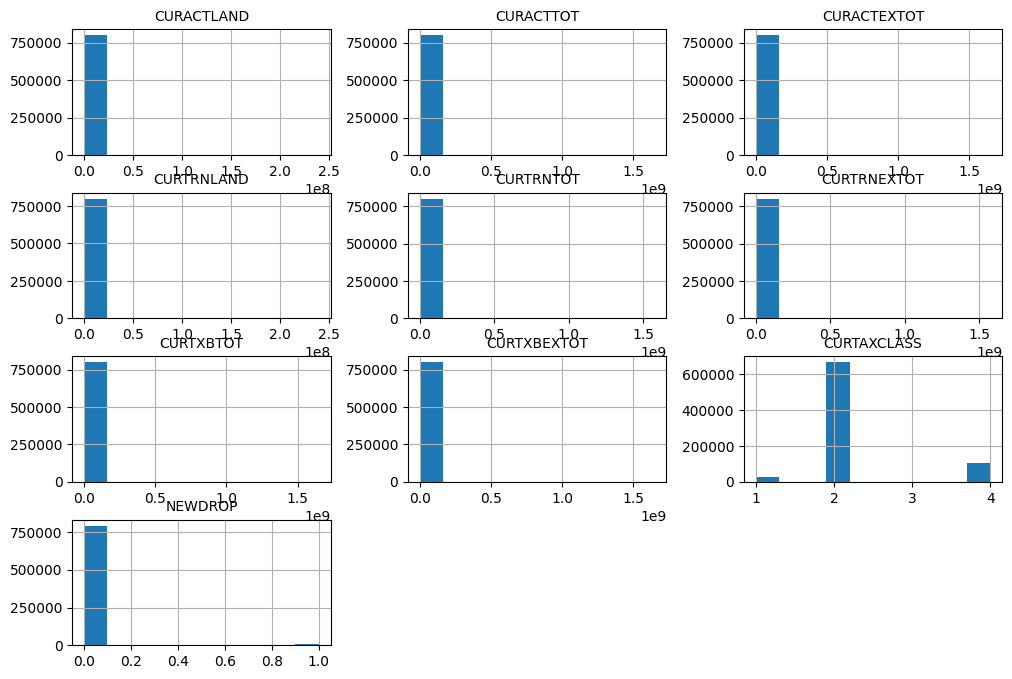

In [25]:
plt.rc('font', size=10)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.iloc[:,5:15].hist(figsize=(12, 8))
plt.show()

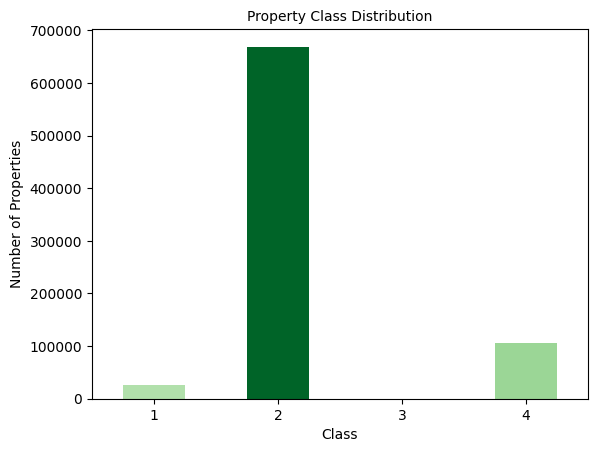

In [26]:
import matplotlib.cm as cm
values = df["CURTAXCLASS"].value_counts().sort_index()

min_val, max_val = min(values), max(values)
adjusted_values = np.interp(values, (min_val, max_val), (0.3, 0.9))

colors = cm.Greens(adjusted_values)
values.plot.bar(rot = 0,grid=False,color=colors)
plt.xlabel("Class")
plt.ylabel("Number of Properties")
plt.title("Property Class Distribution")
plt.show()

In [27]:
df["UNITS"].describe().apply(lambda x: format(x, 'f'))

,UNITS
count,800133.000000
mean,7.766624
std,51.502024
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,8812.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800133 entries, 33 to 1048574
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   BORO           800133 non-null  int64  
 1   LOT            800133 non-null  int64  
 2   YEAR           800133 non-null  int64  
 3   CURMKTLAND     800133 non-null  int64  
 4   CURMKTTOT      800133 non-null  int64  
 5   CURACTLAND     800133 non-null  int64  
 6   CURACTTOT      800133 non-null  int64  
 7   CURACTEXTOT    800133 non-null  int64  
 8   CURTRNLAND     800133 non-null  int64  
 9   CURTRNTOT      800133 non-null  int64  
 10  CURTRNEXTOT    800133 non-null  int64  
 11  CURTXBTOT      800133 non-null  int64  
 12  CURTXBEXTOT    800133 non-null  int64  
 13  CURTAXCLASS    800133 non-null  int64  
 14  NEWDROP        800104 non-null  float64
 15  NOAV           800076 non-null  object 
 16  BLDG_CLASS     800133 non-null  object 
 17  ZONING         725372 non-null  

In [29]:
df['NEWDROP'].value_counts()

,count
NEWDROP,
0.0,792612
1.0,7492


In [30]:
# Droping the column as the percent of True Values is less
df.drop('NEWDROP', inplace=True, axis=1)

In [31]:
df['NOAV'].value_counts()

,count
NOAV,
0,585900
0,213823
Y,353


In [32]:
# Droping the column as the percent of True Values is less
df.drop('NOAV', inplace=True, axis=1)

In [33]:
df['BLDG_CLASS'].value_counts()

,count
BLDG_CLASS,
R4,498636
C7,27020
R0,16852
RB,16487
R1,15131
...,...
N1,5
GU,5
DB,2


In [34]:
df['GEPSUPPORT_RC'].value_counts()

,count
GEPSUPPORT_RC,
0.0,763943
00,28127
59,3032
42,1808
59,1659
16.0,509
12.0,476
EE,386
12,28


In [35]:
df['GEPSUPPORT_RC'].replace("00","Verified", inplace=True)
df['GEPSUPPORT_RC'].replace(np.nan,"Unverified", inplace=True)
df['GEPSUPPORT_RC'].value_counts()

,count
GEPSUPPORT_RC,
0.0,763943
Verified,28127
59,3032
42,1808
59,1659
16.0,509
12.0,476
EE,386
Unverified,87


In [36]:
df['GEPSUPPORT_RC'] = np.where(df['GEPSUPPORT_RC'].isin(['Verified', 'Unverified']), df['GEPSUPPORT_RC'], 'Exceptions')
df['GEPSUPPORT_RC'].value_counts()

,count
GEPSUPPORT_RC,
Exceptions,771919
Verified,28127
Unverified,87


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800133 entries, 33 to 1048574
Data columns (total 39 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   BORO           800133 non-null  int64  
 1   LOT            800133 non-null  int64  
 2   YEAR           800133 non-null  int64  
 3   CURMKTLAND     800133 non-null  int64  
 4   CURMKTTOT      800133 non-null  int64  
 5   CURACTLAND     800133 non-null  int64  
 6   CURACTTOT      800133 non-null  int64  
 7   CURACTEXTOT    800133 non-null  int64  
 8   CURTRNLAND     800133 non-null  int64  
 9   CURTRNTOT      800133 non-null  int64  
 10  CURTRNEXTOT    800133 non-null  int64  
 11  CURTXBTOT      800133 non-null  int64  
 12  CURTXBEXTOT    800133 non-null  int64  
 13  CURTAXCLASS    800133 non-null  int64  
 14  BLDG_CLASS     800133 non-null  object 
 15  ZONING         725372 non-null  object 
 16  HOUSENUM_LO    798630 non-null  object 
 17  HOUSENUM_HI    732842 non-null  

In [38]:
df['LOT_IRREG'].value_counts()

,count
LOT_IRREG,
R,380368
I,345567


In [39]:
df['LOT_IRREG'].replace(np.nan,"Other", inplace=True)
df['LOT_IRREG'].replace("R","Regular", inplace=True)
df['LOT_IRREG'].replace("I","Irregular", inplace=True)
df['LOT_IRREG'].value_counts()

,count
LOT_IRREG,
Regular,380368
Irregular,345567
Other,74198


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800133 entries, 33 to 1048574
Data columns (total 39 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   BORO           800133 non-null  int64  
 1   LOT            800133 non-null  int64  
 2   YEAR           800133 non-null  int64  
 3   CURMKTLAND     800133 non-null  int64  
 4   CURMKTTOT      800133 non-null  int64  
 5   CURACTLAND     800133 non-null  int64  
 6   CURACTTOT      800133 non-null  int64  
 7   CURACTEXTOT    800133 non-null  int64  
 8   CURTRNLAND     800133 non-null  int64  
 9   CURTRNTOT      800133 non-null  int64  
 10  CURTRNEXTOT    800133 non-null  int64  
 11  CURTXBTOT      800133 non-null  int64  
 12  CURTXBEXTOT    800133 non-null  int64  
 13  CURTAXCLASS    800133 non-null  int64  
 14  BLDG_CLASS     800133 non-null  object 
 15  ZONING         725372 non-null  object 
 16  HOUSENUM_LO    798630 non-null  object 
 17  HOUSENUM_HI    732842 non-null  

In [41]:
df['BLD_EXT'].value_counts()

,count
BLD_EXT,
N,590964
E,50178
EG,4446
G,970


In [42]:
df['BLD_EXT'].replace(np.nan,"N", inplace=True)
df['BLD_EXT'].value_counts()

,count
BLD_EXT,
N,744539
E,50178
EG,4446
G,970


In [43]:
df['CORNER'].value_counts()

,count
CORNER,
CR,71056
NE,48042
NW,36746
SE,36153
SW,33365
00,14


In [44]:
df.drop('CORNER', inplace=True, axis=1)

In [45]:
df['CONDO_SFX1'].value_counts()

,count
CONDO_SFX1,
R,522394
C,55790


In [46]:
df['CONDO_SFX1'].replace(np.nan,"Other", inplace=True)
df['CONDO_SFX1'].value_counts()

,count
CONDO_SFX1,
R,522394
Other,221949
C,55790


In [47]:
df['CONDO_SFX2'].value_counts()

,count
CONDO_SFX2,
1.0,537670
2.0,30412
3.0,8483
4.0,987
5.0,596
6.0,18
7.0,18


In [48]:
df['CONDO_SFX2'].replace(np.nan,"Other", inplace=True)
df['CONDO_SFX2'].value_counts()

,count
CONDO_SFX2,
1.0,537670
Other,221949
2.0,30412
3.0,8483
4.0,987
5.0,596
6.0,18
7.0,18


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800133 entries, 33 to 1048574
Data columns (total 38 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   BORO           800133 non-null  int64  
 1   LOT            800133 non-null  int64  
 2   YEAR           800133 non-null  int64  
 3   CURMKTLAND     800133 non-null  int64  
 4   CURMKTTOT      800133 non-null  int64  
 5   CURACTLAND     800133 non-null  int64  
 6   CURACTTOT      800133 non-null  int64  
 7   CURACTEXTOT    800133 non-null  int64  
 8   CURTRNLAND     800133 non-null  int64  
 9   CURTRNTOT      800133 non-null  int64  
 10  CURTRNEXTOT    800133 non-null  int64  
 11  CURTXBTOT      800133 non-null  int64  
 12  CURTXBEXTOT    800133 non-null  int64  
 13  CURTAXCLASS    800133 non-null  int64  
 14  BLDG_CLASS     800133 non-null  object 
 15  ZONING         725372 non-null  object 
 16  HOUSENUM_LO    798630 non-null  object 
 17  HOUSENUM_HI    732842 non-null  

In [50]:
df['CURTAXFLAG'].value_counts()

,count
CURTAXFLAG,
T,493431
A,306702


In [51]:
df['ZONING'].value_counts()

,count
ZONING,
R8B,68970
R7-2,62454
C1-9,55171
R8,46428
C6-4,42888
...,...
M1-4R9A,6
M14R9A,6
M14R7A,6


In [52]:
def replace_zoning_with_first_letter(zoning_value):

  if isinstance(zoning_value, str) and zoning_value:
    return zoning_value[0]
  else:
    return zoning_value

# Apply the function to the 'ZONING' column
df['ZONING'] = df['ZONING'].apply(replace_zoning_with_first_letter)
df['ZONING'].value_counts()

,count
ZONING,
C,370708
R,304753
M,30516
B,14017
N,4908
P,456
Z,14


In [53]:
df['ZONING'].replace("B","BPC", inplace=True)
df['ZONING'].replace("N","NZS", inplace=True)
df['ZONING'].value_counts()

,count
ZONING,
C,370708
R,304753
M,30516
BPC,14017
NZS,4908
P,456
Z,14


In [54]:
df = df[df['ZONING'] != 'Z']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800119 entries, 33 to 1048574
Data columns (total 38 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   BORO           800119 non-null  int64  
 1   LOT            800119 non-null  int64  
 2   YEAR           800119 non-null  int64  
 3   CURMKTLAND     800119 non-null  int64  
 4   CURMKTTOT      800119 non-null  int64  
 5   CURACTLAND     800119 non-null  int64  
 6   CURACTTOT      800119 non-null  int64  
 7   CURACTEXTOT    800119 non-null  int64  
 8   CURTRNLAND     800119 non-null  int64  
 9   CURTRNTOT      800119 non-null  int64  
 10  CURTRNEXTOT    800119 non-null  int64  
 11  CURTXBTOT      800119 non-null  int64  
 12  CURTXBEXTOT    800119 non-null  int64  
 13  CURTAXCLASS    800119 non-null  int64  
 14  BLDG_CLASS     800119 non-null  object 
 15  ZONING         725358 non-null  object 
 16  HOUSENUM_LO    798630 non-null  object 
 17  HOUSENUM_HI    732842 non-null  

In [55]:
df['ZONING'].value_counts()

,count
ZONING,
C,370708
R,304753
M,30516
BPC,14017
NZS,4908
P,456


In [56]:
df['ZONING'].replace(np.nan,"OZS", inplace=True)
df['ZONING'].value_counts()

,count
ZONING,
C,370708
R,304753
OZS,74761
M,30516
BPC,14017
NZS,4908
P,456


In [57]:
def building_class_first_letter(value):

  if isinstance(value, str) and value:
    return value[0]
  else:
    return value

# Apply the function to the 'ZONING' column
df['BLDG_CLASS'] = df['BLDG_CLASS'].apply(building_class_first_letter)
df['BLDG_CLASS'].value_counts().sort_index()

,count
BLDG_CLASS,
A,8970
B,6723
C,87476
D,35031
E,988
F,221
G,1733
H,3754
I,1443


## Data Transformation

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800119 entries, 33 to 1048574
Data columns (total 38 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   BORO           800119 non-null  int64  
 1   LOT            800119 non-null  int64  
 2   YEAR           800119 non-null  int64  
 3   CURMKTLAND     800119 non-null  int64  
 4   CURMKTTOT      800119 non-null  int64  
 5   CURACTLAND     800119 non-null  int64  
 6   CURACTTOT      800119 non-null  int64  
 7   CURACTEXTOT    800119 non-null  int64  
 8   CURTRNLAND     800119 non-null  int64  
 9   CURTRNTOT      800119 non-null  int64  
 10  CURTRNEXTOT    800119 non-null  int64  
 11  CURTXBTOT      800119 non-null  int64  
 12  CURTXBEXTOT    800119 non-null  int64  
 13  CURTAXCLASS    800119 non-null  int64  
 14  BLDG_CLASS     800119 non-null  object 
 15  ZONING         800119 non-null  object 
 16  HOUSENUM_LO    798630 non-null  object 
 17  HOUSENUM_HI    732842 non-null  

In [59]:
df['CURTAXFLAG'].value_counts()

,count
CURTAXFLAG,
T,493431
A,306688


In [60]:
df['CURTAXFLAG'] = df['CURTAXFLAG'].map({'T': 1, 'A': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800119 entries, 33 to 1048574
Data columns (total 38 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   BORO           800119 non-null  int64  
 1   LOT            800119 non-null  int64  
 2   YEAR           800119 non-null  int64  
 3   CURMKTLAND     800119 non-null  int64  
 4   CURMKTTOT      800119 non-null  int64  
 5   CURACTLAND     800119 non-null  int64  
 6   CURACTTOT      800119 non-null  int64  
 7   CURACTEXTOT    800119 non-null  int64  
 8   CURTRNLAND     800119 non-null  int64  
 9   CURTRNTOT      800119 non-null  int64  
 10  CURTRNEXTOT    800119 non-null  int64  
 11  CURTXBTOT      800119 non-null  int64  
 12  CURTXBEXTOT    800119 non-null  int64  
 13  CURTAXCLASS    800119 non-null  int64  
 14  BLDG_CLASS     800119 non-null  object 
 15  ZONING         800119 non-null  object 
 16  HOUSENUM_LO    798630 non-null  object 
 17  HOUSENUM_HI    732842 non-null  

In [61]:
X=df.drop(['BORO','YEAR','LOT','CURTAXCLASS','HOUSENUM_LO','HOUSENUM_HI','STREET_NAME','ZIP_CODE'], axis=1)
y=df['CURTAXCLASS']

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800119 entries, 33 to 1048574
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CURMKTLAND     800119 non-null  int64  
 1   CURMKTTOT      800119 non-null  int64  
 2   CURACTLAND     800119 non-null  int64  
 3   CURACTTOT      800119 non-null  int64  
 4   CURACTEXTOT    800119 non-null  int64  
 5   CURTRNLAND     800119 non-null  int64  
 6   CURTRNTOT      800119 non-null  int64  
 7   CURTRNEXTOT    800119 non-null  int64  
 8   CURTXBTOT      800119 non-null  int64  
 9   CURTXBEXTOT    800119 non-null  int64  
 10  BLDG_CLASS     800119 non-null  object 
 11  ZONING         800119 non-null  object 
 12  GEPSUPPORT_RC  800119 non-null  object 
 13  LOT_FRT        800119 non-null  float64
 14  LOT_DEP        800119 non-null  float64
 15  LOT_IRREG      800119 non-null  object 
 16  BLD_FRT        800119 non-null  float64
 17  BLD_DEP        800119 non-null  

In [63]:
X.head()

,CURMKTLAND,CURMKTTOT,CURACTLAND,CURACTTOT,CURACTEXTOT,CURTRNLAND,CURTRNTOT,CURTRNEXTOT,CURTXBTOT,CURTXBEXTOT,...,LAND_AREA,NUM_BLDGS,YRBUILT,UNITS,CONDO_SFX1,CONDO_SFX2,UAF_LAND,UAF_BLDG,GROSS_SQFT,CURTAXFLAG
33,13078,374414,5885,168486,0,5885,153151,0,153151,0,...,0,1,2005,1,R,1.0,0.2137,0.2137,800,1
34,2826000,11321000,169560,679260,0,99383,398131,0,398131,0,...,1979,1,1910,1,Other,Other,0.0000,0.0000,4025,1
35,2448000,8389000,146880,503340,0,50850,174256,0,174256,0,...,1979,1,1900,3,Other,Other,0.0000,0.0000,3332,1
38,400000,4817000,180000,2167650,0,55058,663033,0,663033,0,...,1985,1,1900,8,Other,Other,0.0000,0.0000,4320,1
39,741000,2766000,333450,1244700,0,333450,1188980,0,1188980,0,...,2375,1,1900,17,Other,Other,0.0000,0.0000,9880,1


In [64]:
X.isna().sum().sum()

np.int64(0)

In [65]:
y.info()

<class 'pandas.core.series.Series'>
Index: 800119 entries, 33 to 1048574
Series name: CURTAXCLASS
Non-Null Count   Dtype
--------------   -----
800119 non-null  int64
dtypes: int64(1)
memory usage: 12.2 MB


In [66]:
y.value_counts()

,count
CURTAXCLASS,
2,668878
4,104930
1,26128
3,183


In [67]:
y.isna().sum().sum()

np.int64(0)

In [68]:
for col in X.select_dtypes(include=object).columns:
    unique_types = X[col].apply(type).nunique()
    if unique_types > 1:
        print(f"Column '{col}' has mixed data types.")

Column 'CONDO_SFX2' has mixed data types.


In [69]:
X['CONDO_SFX2'] = X['CONDO_SFX2'].astype(str)

In [70]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=['int64', 'float64'])),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [71]:
X_prepared = preprocessing.fit_transform(X)
X_prepared

array([[-0.12930113, -0.12801664, -0.1191261 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31041592,  0.2603744 , -0.06207086, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.25132681,  0.15634539, -0.06997685, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.03489581, -0.02144772, -0.10827279, ...,  0.        ,
         0.        ,  1.        ],
       [-0.03755326, -0.00572983, -0.02705861, ...,  0.        ,
         0.        ,  1.        ],
       [-0.04052335, -0.05462204, -0.10902575, ...,  0.        ,
         0.        ,  1.        ]])

In [72]:
X_prepared_fr = pd.DataFrame(
    X_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=X.index)
X_prepared_fr.head()

,pipeline-1__CURMKTLAND,pipeline-1__CURMKTTOT,pipeline-1__CURACTLAND,pipeline-1__CURACTTOT,pipeline-1__CURACTEXTOT,pipeline-1__CURTRNLAND,pipeline-1__CURTRNTOT,pipeline-1__CURTRNEXTOT,pipeline-1__CURTXBTOT,pipeline-1__CURTXBEXTOT,...,pipeline-2__CONDO_SFX1_Other,pipeline-2__CONDO_SFX1_R,pipeline-2__CONDO_SFX2_1.0,pipeline-2__CONDO_SFX2_2.0,pipeline-2__CONDO_SFX2_3.0,pipeline-2__CONDO_SFX2_4.0,pipeline-2__CONDO_SFX2_5.0,pipeline-2__CONDO_SFX2_6.0,pipeline-2__CONDO_SFX2_7.0,pipeline-2__CONDO_SFX2_Other
33,-0.129301,-0.128017,-0.119126,-0.121320,-0.051622,-0.112753,-0.116866,-0.051581,-0.115451,-0.05142,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,0.310416,0.260374,-0.062071,-0.081014,-0.051622,-0.080200,-0.097226,-0.051581,-0.095711,-0.05142,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35,0.251327,0.156345,-0.069977,-0.094896,-0.051622,-0.097098,-0.115174,-0.051581,-0.113750,-0.05142,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38,-0.068817,0.029609,-0.058432,0.036438,-0.051622,-0.095633,-0.075989,-0.051581,-0.074366,-0.05142,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39,-0.015512,-0.043162,-0.004941,-0.036394,-0.051622,0.001294,-0.033825,-0.051581,-0.031986,-0.05142,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [73]:
X_prepared_fr.shape

(800119, 75)

In [74]:
# Check for Normality of Dataset:

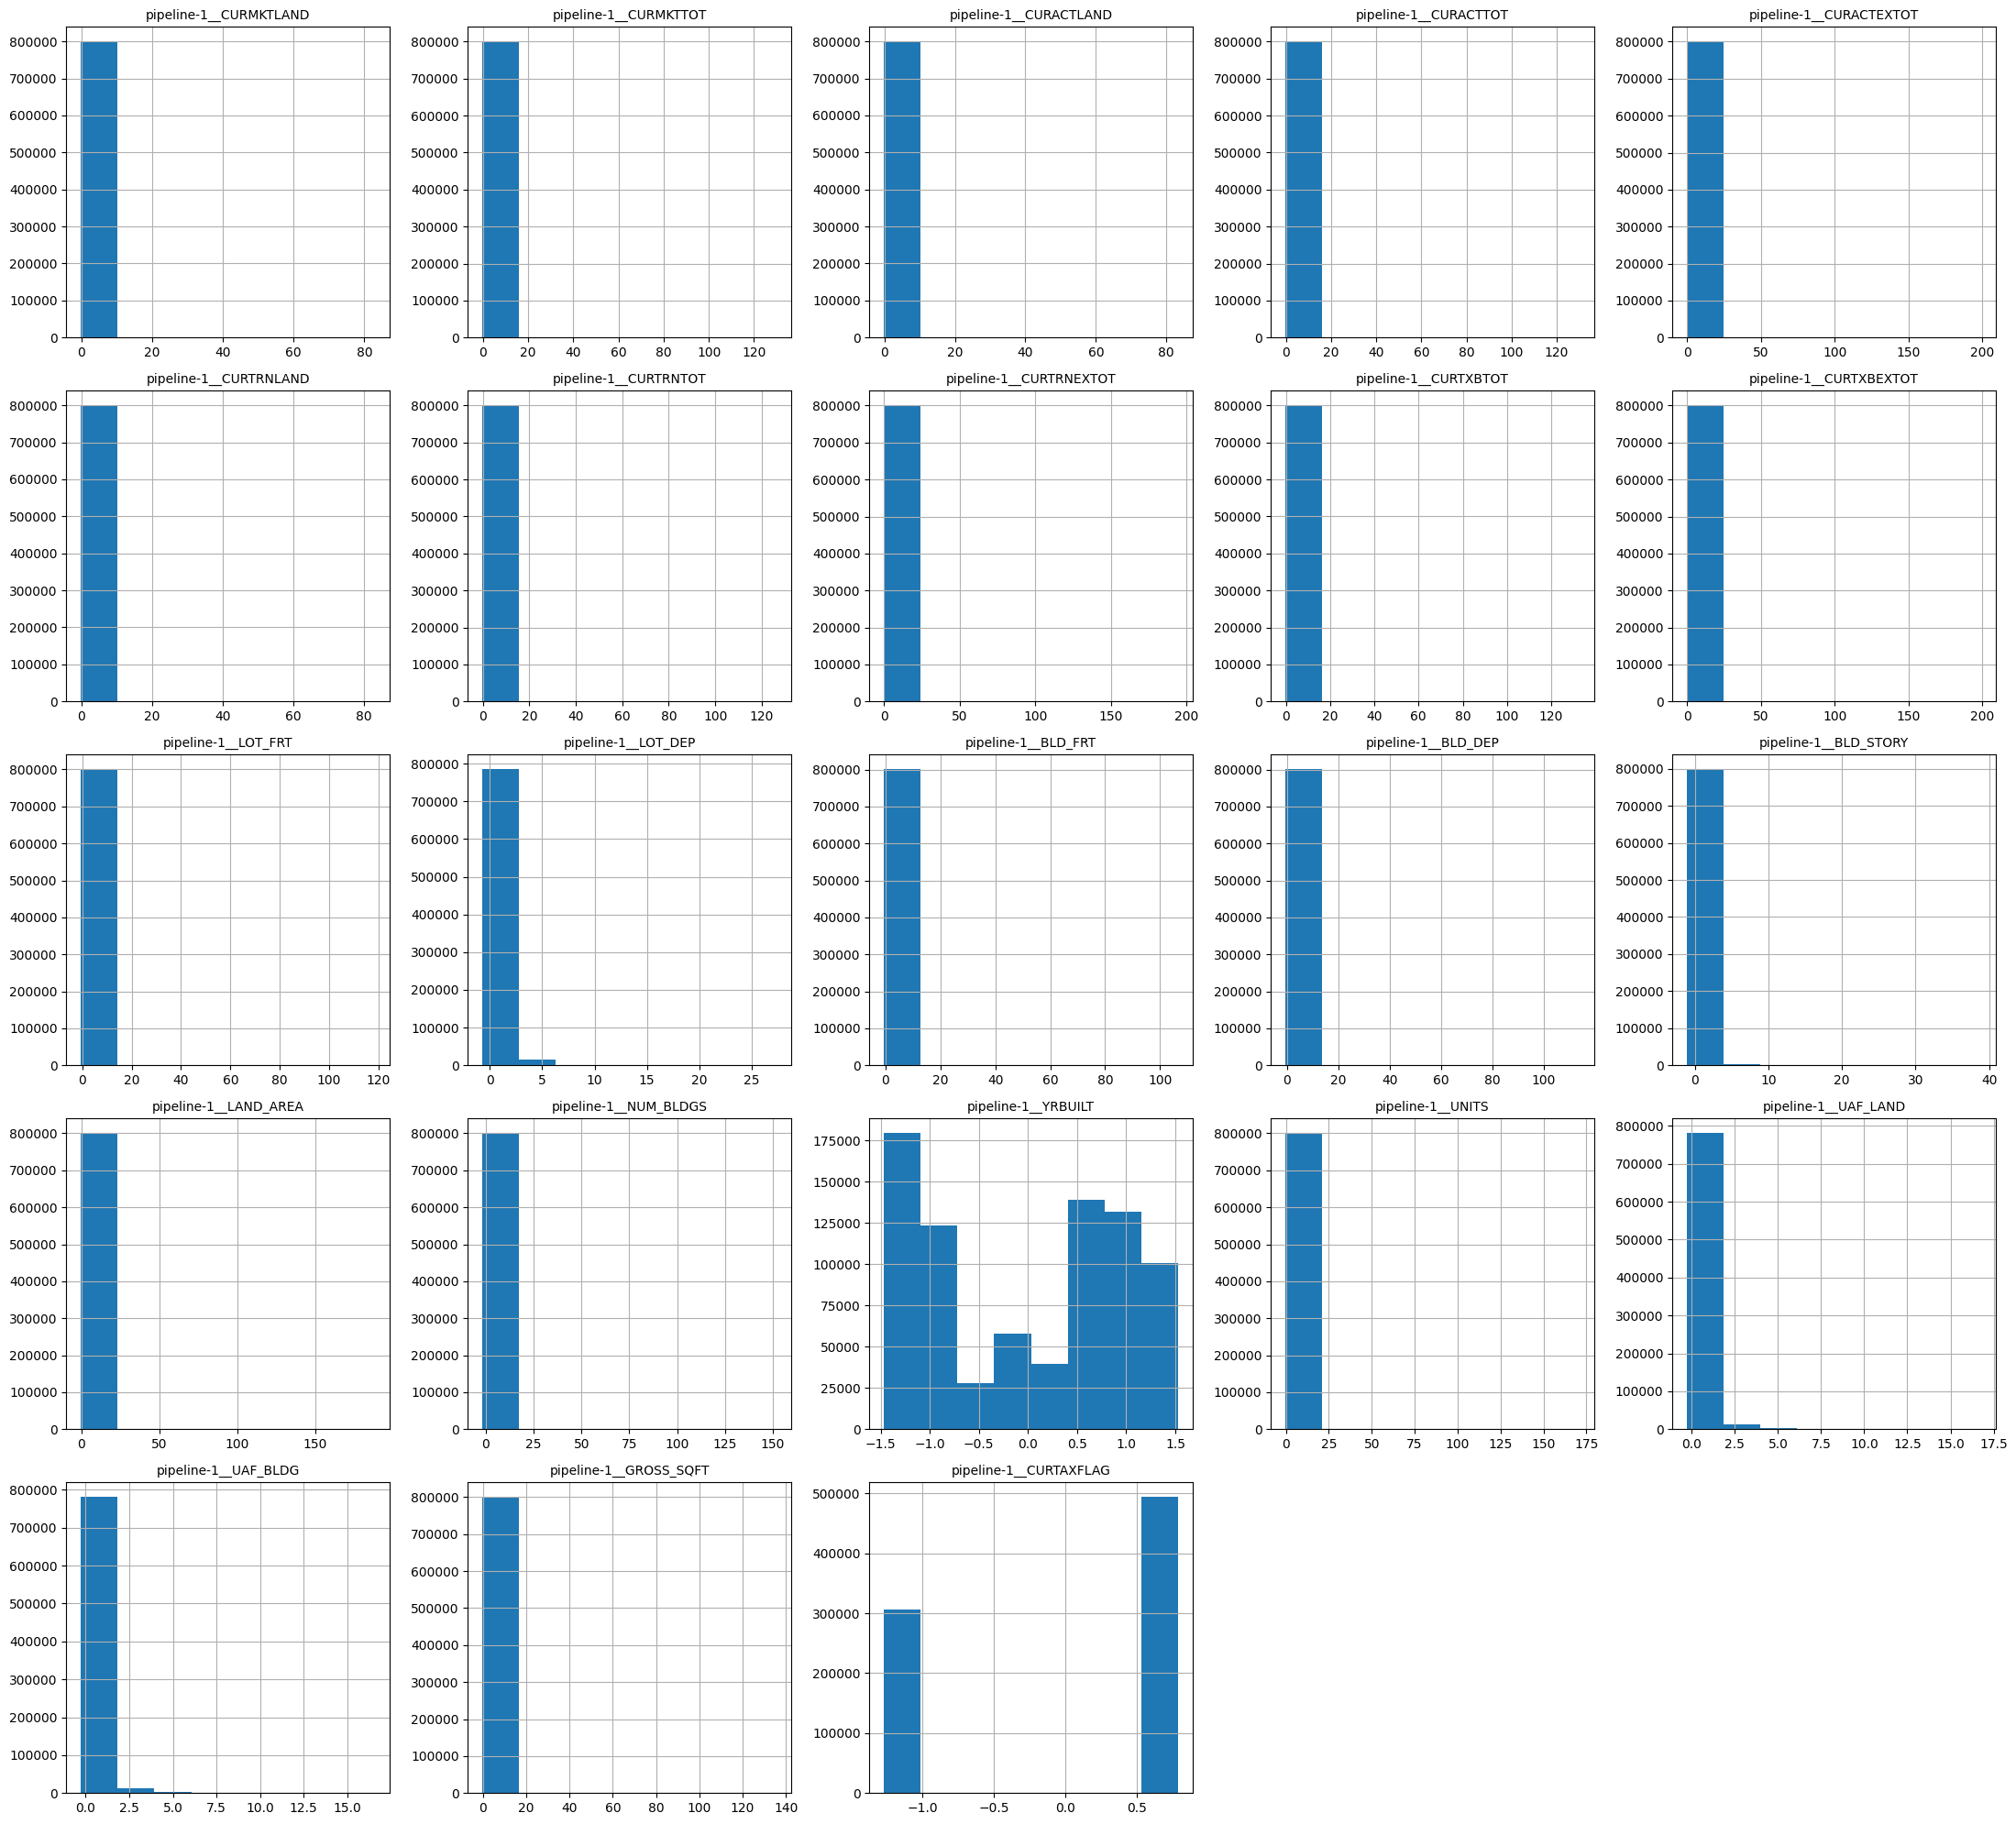

In [75]:
import matplotlib.pyplot as plt

# Filter out columns with pipeline-1 prefix (numerical columns)
num_cols_pipeline_1 = [col for col in X_prepared_fr.columns if col.startswith('pipeline-1')]

X_prepared_fr[num_cols_pipeline_1].hist(figsize=(22, 20), bins=8)
plt.tight_layout()
plt.show()


In [76]:
# Check for Independence of Features:

In [77]:
import pandas as pd

# Compute the correlation matrix for the entire dataframe
correlation_matrix = X_prepared_fr.corr()

# Threshold for high correlation (0.8 or -0.8)
threshold = 0.8


high_correlation_pairs = []
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if abs(correlation_matrix.loc[row, col]) >= threshold and row != col:
            # Ensure that we only add each pair once (avoid duplicates like (A, B) and (B, A))
            if (col, row) not in high_correlation_pairs and (row, col) not in high_correlation_pairs:
                high_correlation_pairs.append((row, col, correlation_matrix.loc[row, col]))

high_correlation_df = pd.DataFrame(high_correlation_pairs, columns=["Feature 1", "Feature 2", "Correlation"])
high_correlation_df = high_correlation_df.sort_values(by="Correlation", ascending=False)

# Show the high correlation pairs
high_correlation_df


,Feature 1,Feature 2,Correlation
73,pipeline-2__CONDO_SFX1_Other,pipeline-2__CONDO_SFX2_Other,1.000000
63,pipeline-2__CONDO_SFX2_Other,pipeline-2__CONDO_SFX1_Other,1.000000
46,pipeline-1__CURACTEXTOT,pipeline-1__CURTXBEXTOT,0.999975
25,pipeline-1__CURTXBEXTOT,pipeline-1__CURACTEXTOT,0.999975
15,pipeline-1__CURTRNLAND,pipeline-1__CURACTLAND,0.999196
...,...,...,...
50,pipeline-2__CONDO_SFX1_Other,pipeline-2__BLDG_CLASS_R,-0.947574
60,pipeline-2__BLDG_CLASS_R,pipeline-2__CONDO_SFX1_Other,-0.947574
72,pipeline-2__BLDG_CLASS_R,pipeline-2__CONDO_SFX2_Other,-0.947574
54,pipeline-2__GEPSUPPORT_RC_Verified,pipeline-2__GEPSUPPORT_RC_Exceptions,-0.998401


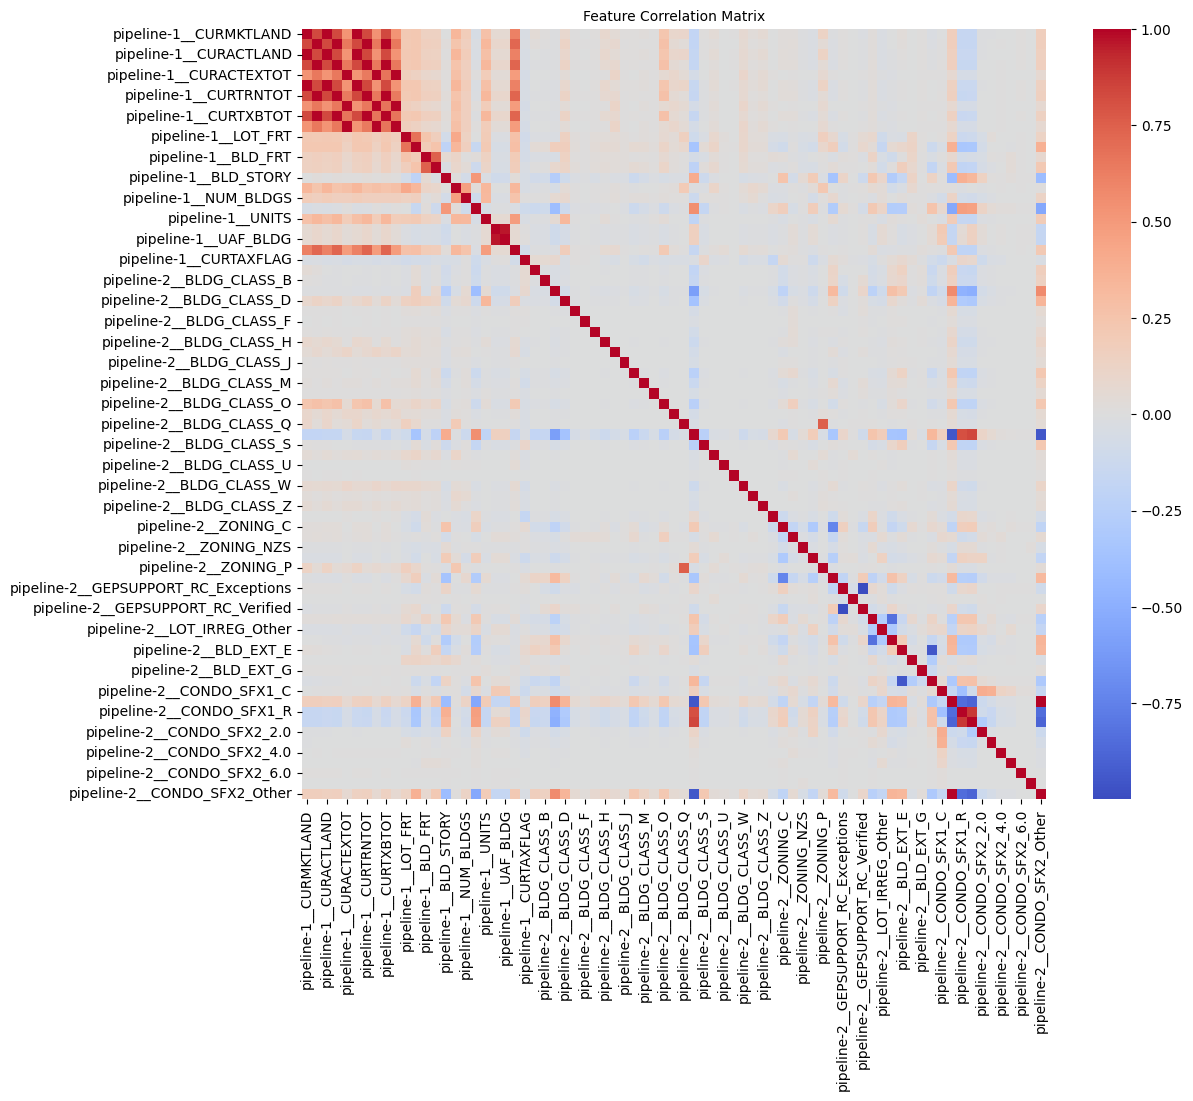

In [78]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(X_prepared_fr.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

In [79]:
y.value_counts(normalize=True)

,proportion
CURTAXCLASS,
2,0.835973
4,0.131143
1,0.032655
3,0.000229


## Data Spliting

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

X_train, X_test, y_train, y_test = train_test_split(X_prepared_fr, y, test_size=0.3, random_state=42)

In [81]:
print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

Shape of Train Features: (560083, 75)
Shape of Test Features: (240036, 75)
Shape of Train Target: (560083,)
Shape of Test Target: (240036,)


In [82]:
X_train.head()

,pipeline-1__CURMKTLAND,pipeline-1__CURMKTTOT,pipeline-1__CURACTLAND,pipeline-1__CURACTTOT,pipeline-1__CURACTEXTOT,pipeline-1__CURTRNLAND,pipeline-1__CURTRNTOT,pipeline-1__CURTRNEXTOT,pipeline-1__CURTXBTOT,pipeline-1__CURTXBEXTOT,...,pipeline-2__CONDO_SFX1_Other,pipeline-2__CONDO_SFX1_R,pipeline-2__CONDO_SFX2_1.0,pipeline-2__CONDO_SFX2_2.0,pipeline-2__CONDO_SFX2_3.0,pipeline-2__CONDO_SFX2_4.0,pipeline-2__CONDO_SFX2_5.0,pipeline-2__CONDO_SFX2_6.0,pipeline-2__CONDO_SFX2_7.0,pipeline-2__CONDO_SFX2_Other
233034,-0.050059,-0.034008,-0.039608,-0.027232,-0.051622,-0.033331,-0.000843,-0.051581,-0.018141,-0.05142,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
931412,-0.125318,-0.123166,-0.115129,-0.116465,-0.051622,-0.108761,-0.112903,-0.051581,-0.111468,-0.05142,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
768089,0.337616,0.087513,0.349417,0.094390,-0.051622,0.355224,0.106944,-0.051581,0.106049,-0.05142,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
295654,-0.126462,-0.135499,-0.116277,-0.128808,-0.051622,-0.109908,-0.124109,-0.051581,-0.122732,-0.05142,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394701,-0.122764,-0.131376,-0.112566,-0.124681,-0.051622,-0.106202,-0.120059,-0.051581,-0.118661,-0.05142,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
X_test.head()

,pipeline-1__CURMKTLAND,pipeline-1__CURMKTTOT,pipeline-1__CURACTLAND,pipeline-1__CURACTTOT,pipeline-1__CURACTEXTOT,pipeline-1__CURTRNLAND,pipeline-1__CURTRNTOT,pipeline-1__CURTRNEXTOT,pipeline-1__CURTXBTOT,pipeline-1__CURTXBEXTOT,...,pipeline-2__CONDO_SFX1_Other,pipeline-2__CONDO_SFX1_R,pipeline-2__CONDO_SFX2_1.0,pipeline-2__CONDO_SFX2_2.0,pipeline-2__CONDO_SFX2_3.0,pipeline-2__CONDO_SFX2_4.0,pipeline-2__CONDO_SFX2_5.0,pipeline-2__CONDO_SFX2_6.0,pipeline-2__CONDO_SFX2_7.0,pipeline-2__CONDO_SFX2_Other
1015917,0.447040,0.401800,0.459223,0.408940,-0.051622,0.464897,0.445631,-0.051581,0.427241,-0.051420,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
341862,-0.129366,-0.129348,-0.119191,-0.122652,-0.051622,-0.112818,-0.116874,-0.051581,-0.115576,-0.051420,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25516,-0.128515,-0.137667,-0.118337,-0.130978,-0.051622,-0.111966,-0.125485,-0.051581,-0.124115,-0.051420,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260303,-0.125162,-0.129859,-0.114972,-0.123163,-0.051622,-0.108605,-0.117318,-0.051581,-0.116098,-0.051420,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
520084,-0.125627,-0.135021,-0.115439,-0.128329,-0.050863,-0.109071,-0.122957,-0.050807,-0.121574,-0.050661,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
y.value_counts(normalize=True)

,proportion
CURTAXCLASS,
2,0.835973
4,0.131143
1,0.032655
3,0.000229


In [85]:
y_train.value_counts(normalize=True)

,proportion
CURTAXCLASS,
2,0.836046
4,0.131148
1,0.032581
3,0.000225


In [86]:
y_test.value_counts(normalize=True)

,proportion
CURTAXCLASS,
2,0.835804
4,0.131130
1,0.032828
3,0.000237


## Model Building

### Lasso

In [ ]:
from sklearn.linear_model import Lasso

# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso(random_state=42)

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X_train, y_train)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': np.float64(1e-05)}


In [ ]:
from sklearn.linear_model import Lasso

# calling the model with the best parameter
lasso1 = Lasso(alpha=0.00001,random_state = 42)
lasso1.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)
lasso1_coef

array([6.09333368e-01, 1.32849256e-01, 8.32607958e-01, 9.91880049e-02,
       6.98554149e-02, 2.25268301e-01, 1.35983090e-02, 3.82095712e-02,
       2.52142762e-02, 2.89138798e-02, 5.01737397e-03, 1.97440272e-03,
       3.62152156e-03, 2.07411319e-03, 2.49526959e-03, 0.00000000e+00,
       1.81524562e-03, 2.67121840e-03, 3.48663350e-03, 3.64478062e-02,
       2.00922782e-02, 2.40584597e-03, 1.19243362e-02, 1.35968934e+00,
       1.51063278e+00, 7.59915037e-01, 7.08854197e-01, 1.30453959e+00,
       1.27031181e+00, 1.28113055e+00, 1.28793374e+00, 1.29063672e+00,
       1.28330335e+00, 1.29644957e+00, 1.29347859e+00, 1.28669221e+00,
       1.28730478e+00, 1.28453489e+00, 1.26182803e+00, 7.08107459e-01,
       8.55004715e-01, 1.25457218e+00, 5.05570186e-01, 1.06180227e+00,
       1.28664157e+00, 1.27698699e+00, 1.26591205e+00, 1.42995674e-02,
       2.64710625e-03, 4.95923140e-04, 0.00000000e+00, 6.60385003e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [ ]:
names = X_train.columns
names

Index(['pipeline-1__CURMKTLAND', 'pipeline-1__CURMKTTOT',
       'pipeline-1__CURACTLAND', 'pipeline-1__CURACTTOT',
       'pipeline-1__CURACTEXTOT', 'pipeline-1__CURTRNLAND',
       'pipeline-1__CURTRNTOT', 'pipeline-1__CURTRNEXTOT',
       'pipeline-1__CURTXBTOT', 'pipeline-1__CURTXBEXTOT',
       'pipeline-1__LOT_FRT', 'pipeline-1__LOT_DEP', 'pipeline-1__BLD_FRT',
       'pipeline-1__BLD_DEP', 'pipeline-1__BLD_STORY', 'pipeline-1__LAND_AREA',
       'pipeline-1__NUM_BLDGS', 'pipeline-1__YRBUILT', 'pipeline-1__UNITS',
       'pipeline-1__UAF_LAND', 'pipeline-1__UAF_BLDG',
       'pipeline-1__GROSS_SQFT', 'pipeline-1__CURTAXFLAG',
       'pipeline-2__BLDG_CLASS_A', 'pipeline-2__BLDG_CLASS_B',
       'pipeline-2__BLDG_CLASS_C', 'pipeline-2__BLDG_CLASS_D',
       'pipeline-2__BLDG_CLASS_E', 'pipeline-2__BLDG_CLASS_F',
       'pipeline-2__BLDG_CLASS_G', 'pipeline-2__BLDG_CLASS_H',
       'pipeline-2__BLDG_CLASS_I', 'pipeline-2__BLDG_CLASS_J',
       'pipeline-2__BLDG_CLASS_K', 'pipeline-

In [ ]:
feature_imp = pd.DataFrame({'Feature': names, 'Importance': lasso1_coef})
feature_imp = feature_imp.sort_values(by='Importance')
df_subset = feature_imp.tail(30)

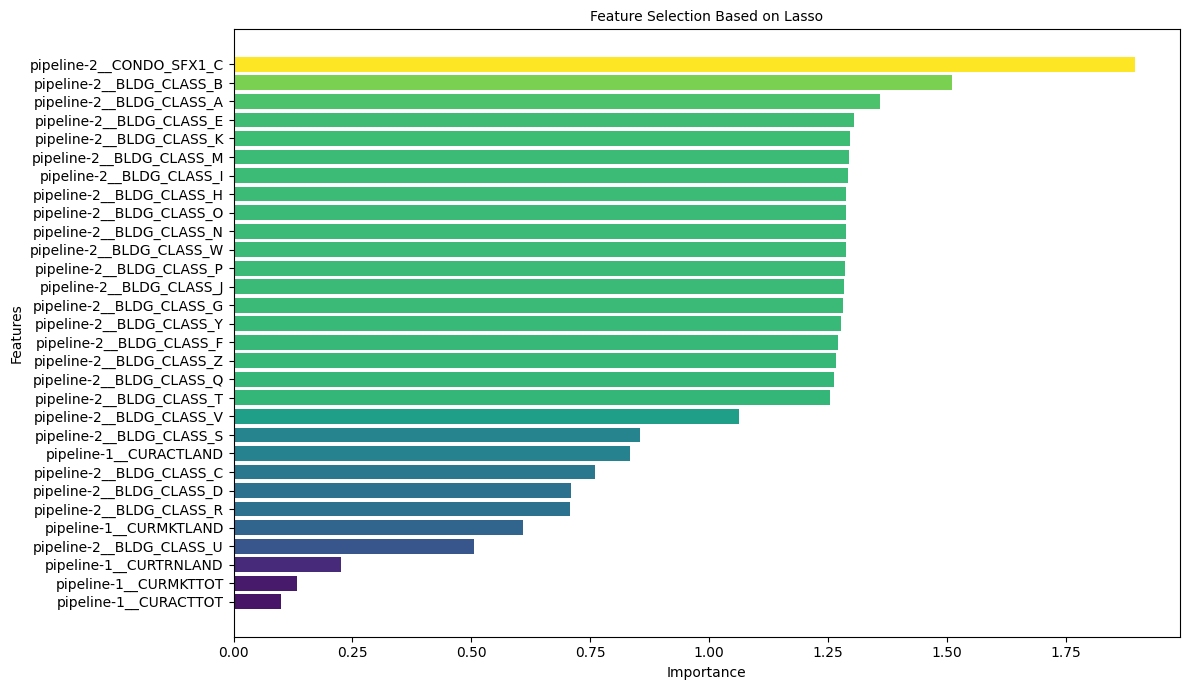

In [ ]:
import matplotlib.cm as cm

# plotting the Column Names and Importance of Columns.
# Normalize Importance values to 0-1 range for colormap
normalized_importance = df_subset['Importance'] / df_subset['Importance'].max()
colors = cm.get_cmap('viridis')(normalized_importance)  # Get colors from colormap

plt.figure(figsize=(12, 7))
plt.barh(df_subset['Feature'], df_subset['Importance'], color=colors)
plt.ylabel("Features")
plt.xlabel("Importance")
plt.title("Feature Selection Based on Lasso")
plt.tight_layout()
plt.show()

Lasso can only be used for Feature Selection but not for classification

As per the Result, building class is an important feature

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(random_state= 0, max_iter = 35)
lreg.fit(X_train,y_train)
print(f"Training score of Logistic Regression: {lreg.score(X_train,y_train):.4f}")
print(f"Testing score of Logistic Regression: {lreg.score(X_test,y_test):.4f}")

Training score of Logistic Regression: 0.9948
Testing score of Logistic Regression: 0.9947


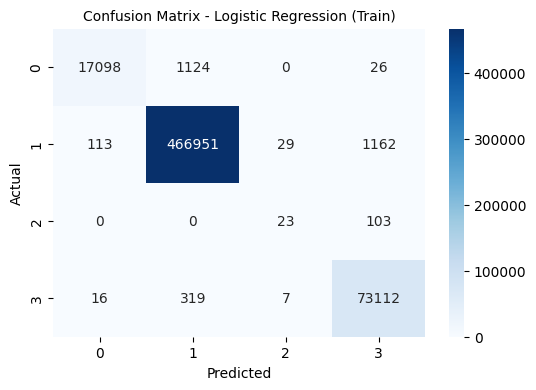

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

matrix_train = confusion_matrix(y_train,lreg.predict(X_train))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_train, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix - Logistic Regression (Train)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

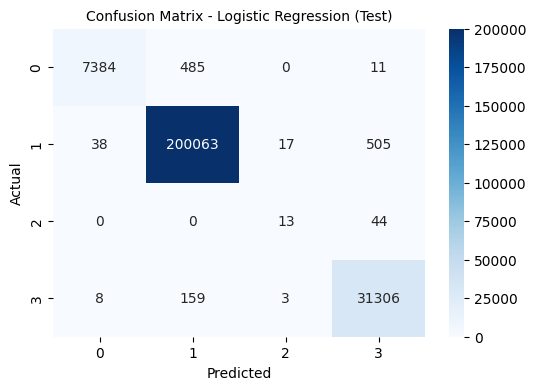

In [ ]:
matrix_test = confusion_matrix(y_test,lreg.predict(X_test))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_test, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix - Logistic Regression (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(classification_report(y_test,lreg.predict(X_test)))

              precision    recall  f1-score   support

           1       0.99      0.94      0.96      7880
           2       1.00      1.00      1.00    200623
           3       0.39      0.23      0.29        57
           4       0.98      0.99      0.99     31476

    accuracy                           0.99    240036
   macro avg       0.84      0.79      0.81    240036
weighted avg       0.99      0.99      0.99    240036



### Decision Tree

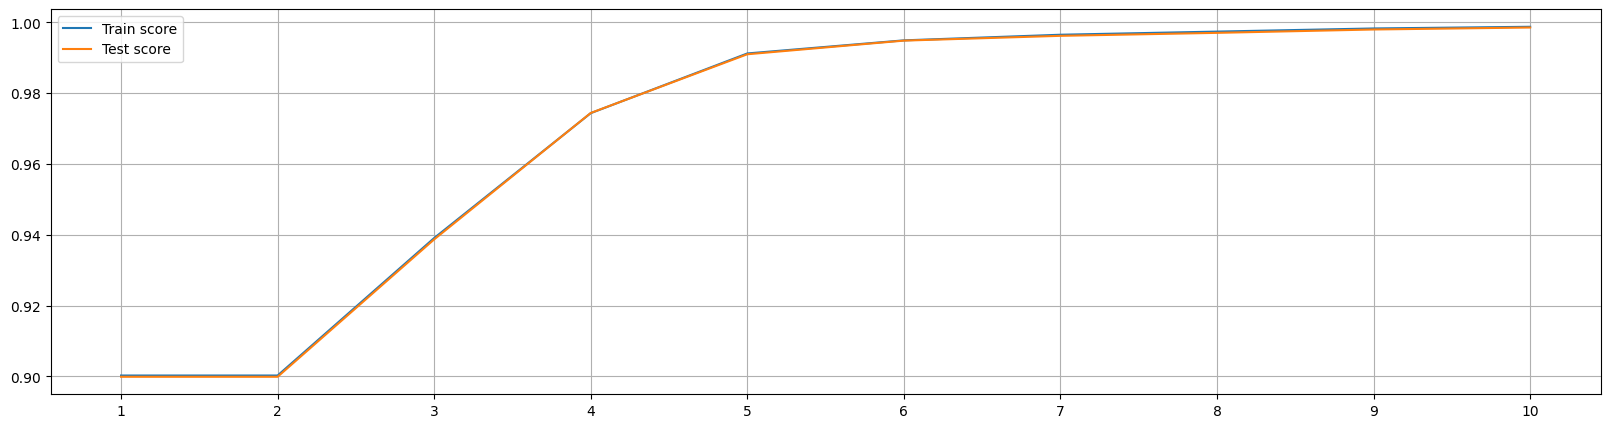

In [ ]:
from sklearn.tree import DecisionTreeClassifier

train_scores = []
test_scores = []
index = []

for i in range(1,11):
  clf = DecisionTreeClassifier(max_depth=i, random_state=42)
  clf.fit(X_train, y_train)
  train_scores.append(clf.score(X_train, y_train))
  test_scores.append(clf.score(X_test, y_test))
  index.append(i)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(index)),  train_scores, label = 'Train score')
plt.plot(range(len(index)), test_scores, label = 'Test score')
plt.xticks(range(len(index)), index)
plt.legend()
plt.grid()
plt.show()

In [87]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state = 42, max_depth = 3)
DT.fit(X_train, y_train)

print("Train Score:", DT.score(X_train,y_train))
print("Valid Score:", DT.score(X_test,y_test))

Train Score: 0.9390786722682174
Valid Score: 0.9386966954956757


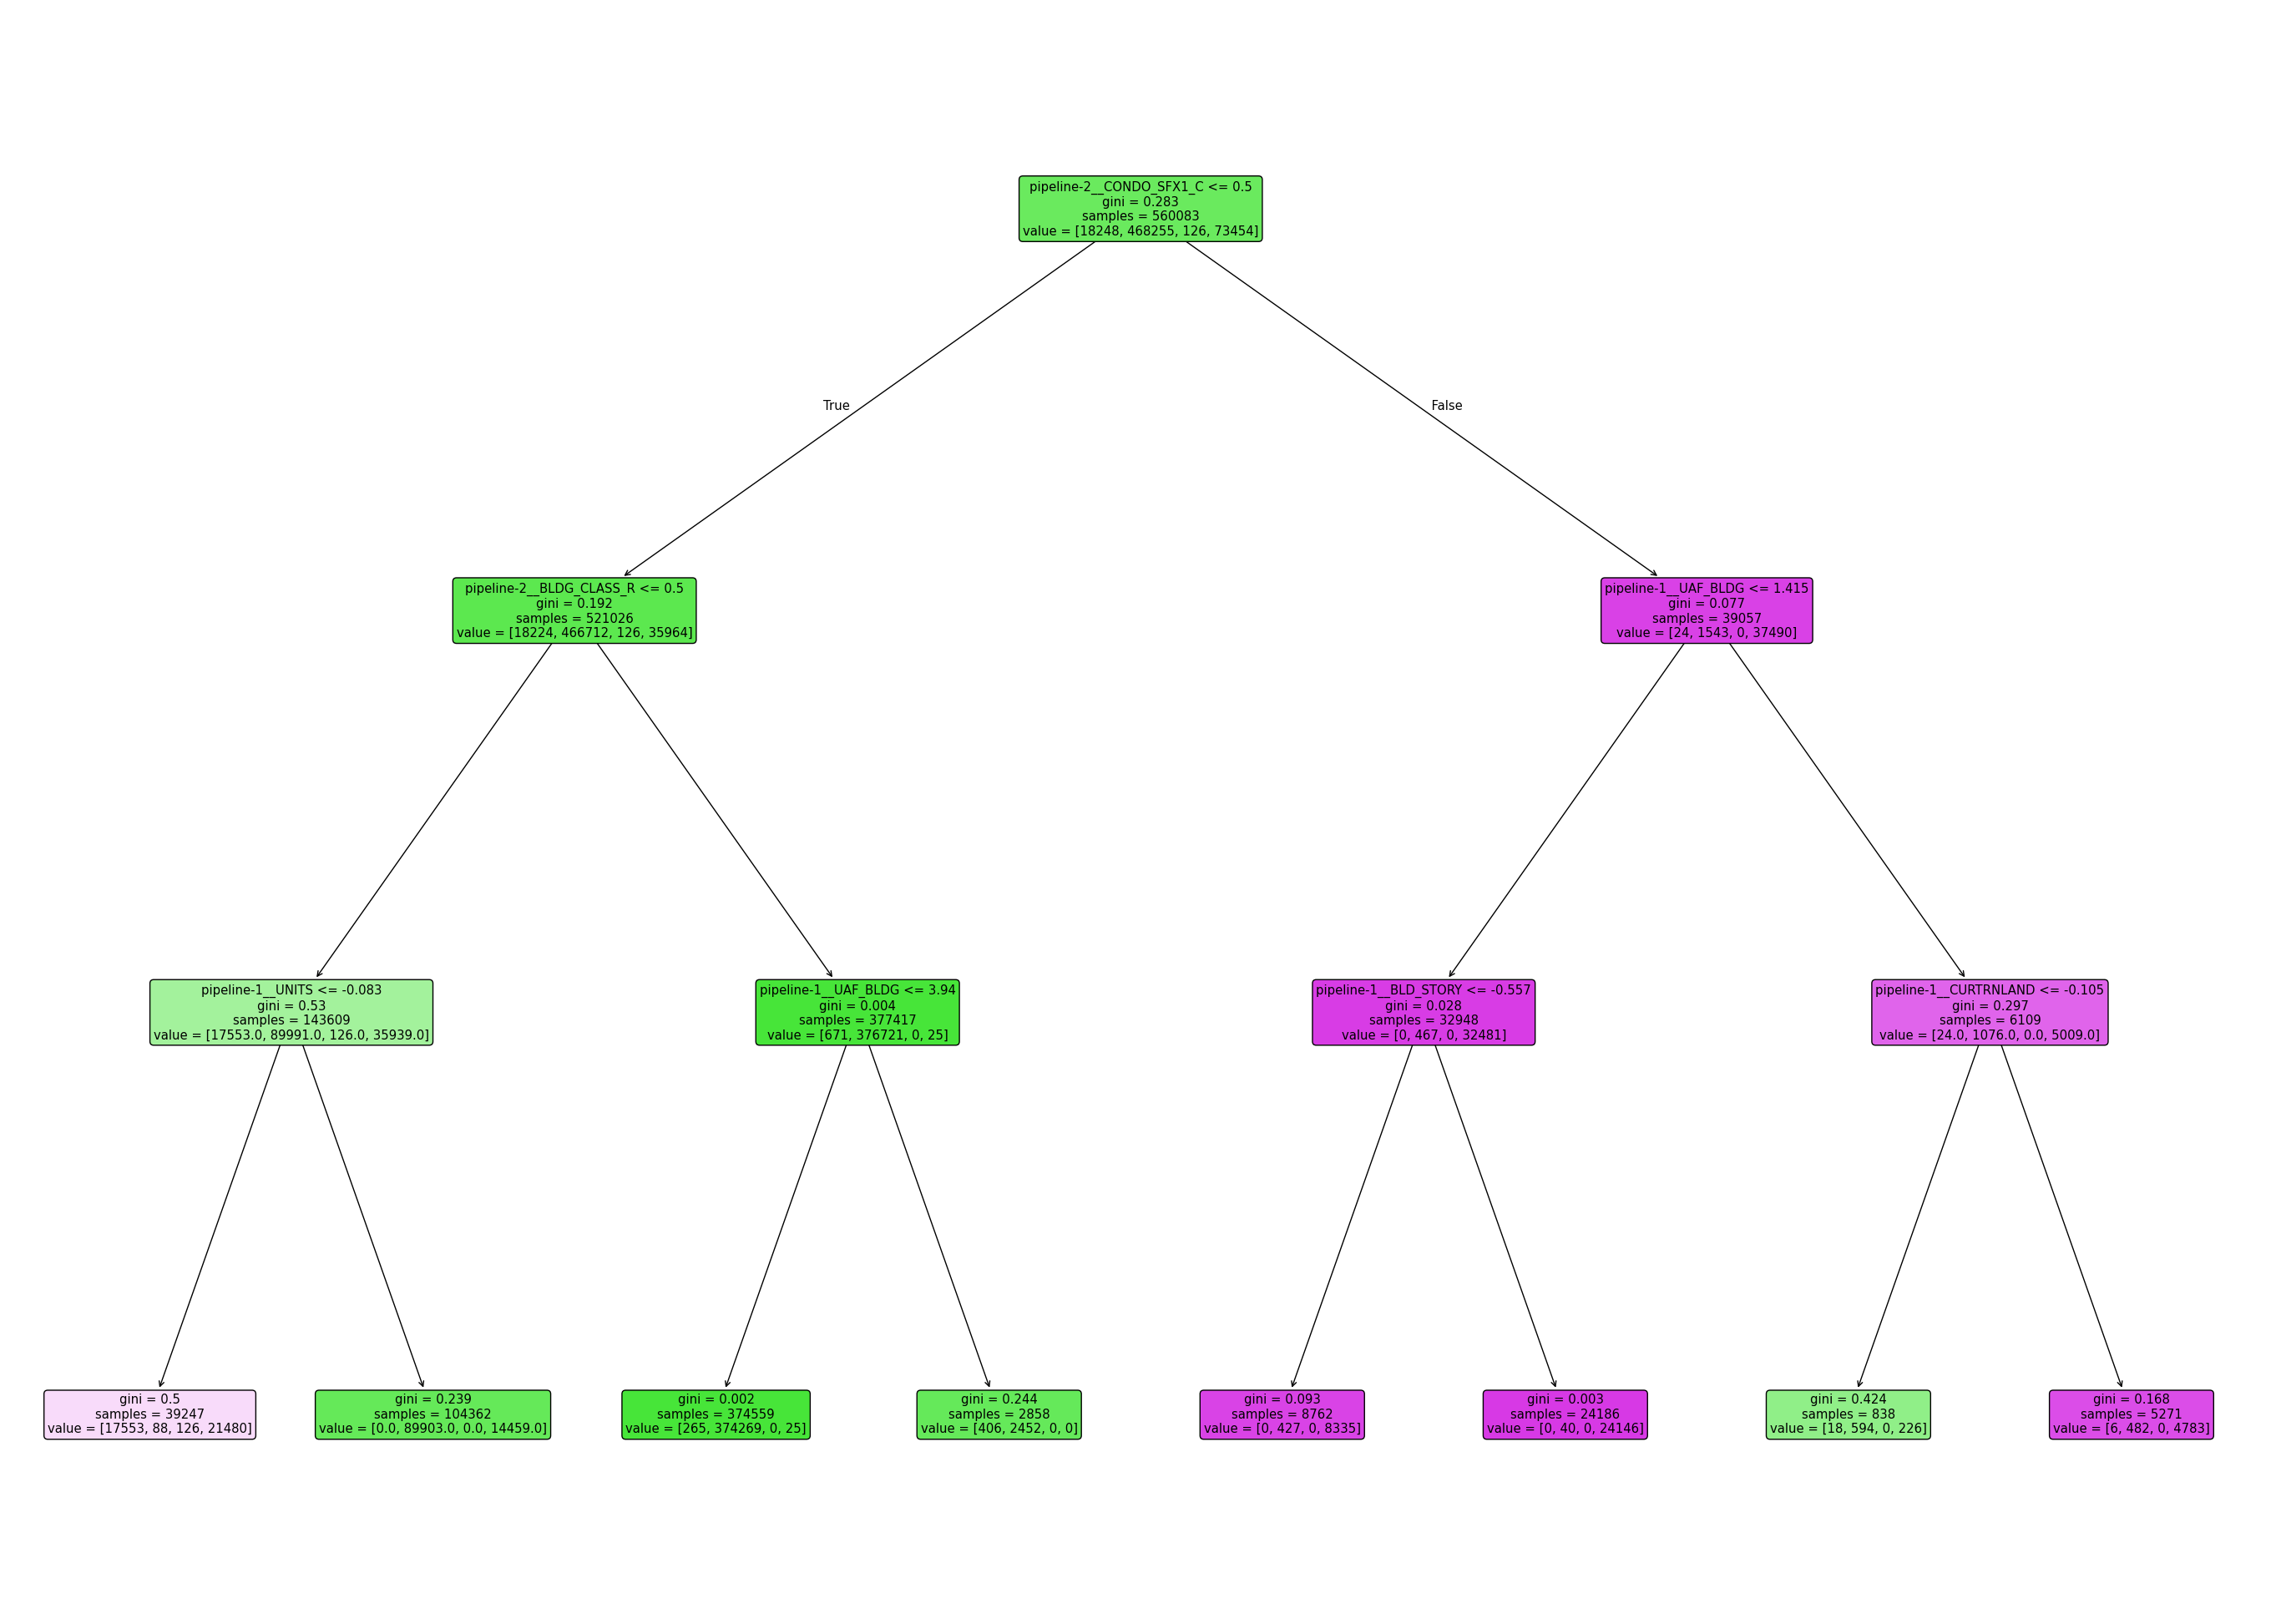

In [88]:
from sklearn import tree

plt.subplots(figsize = (35,25))
tree.plot_tree(DT,
               feature_names = X_train.columns,
               filled=True,
               rounded = True, )
plt.show()

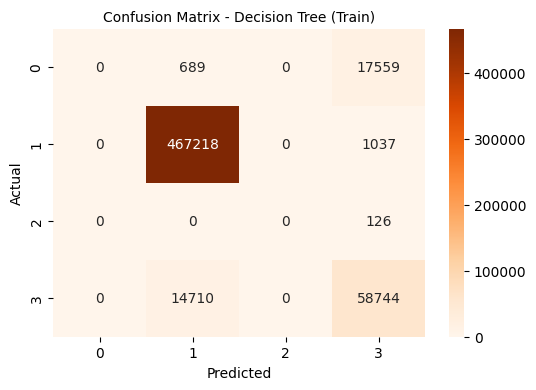

In [90]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix_train = confusion_matrix(y_train,DT.predict(X_train))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_train, annot=True, fmt="d", cmap="Oranges")

plt.title("Confusion Matrix - Decision Tree (Train)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

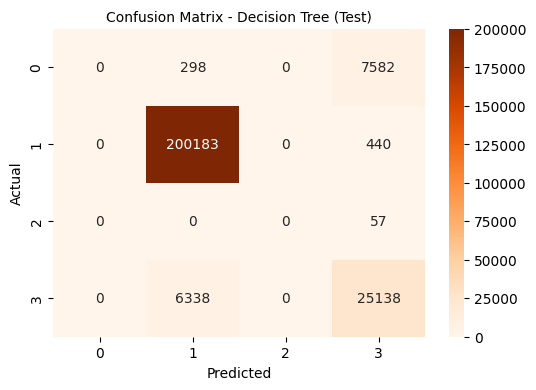

In [91]:
matrix_train = confusion_matrix(y_test,DT.predict(X_test))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_train, annot=True, fmt="d", cmap="Oranges")

plt.title("Confusion Matrix - Decision Tree (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test,DT.predict(X_test)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      7880
           2       0.97      1.00      0.98    200623
           3       0.00      0.00      0.00        57
           4       0.76      0.80      0.78     31476

    accuracy                           0.94    240036
   macro avg       0.43      0.45      0.44    240036
weighted avg       0.91      0.94      0.92    240036



### Random Forest

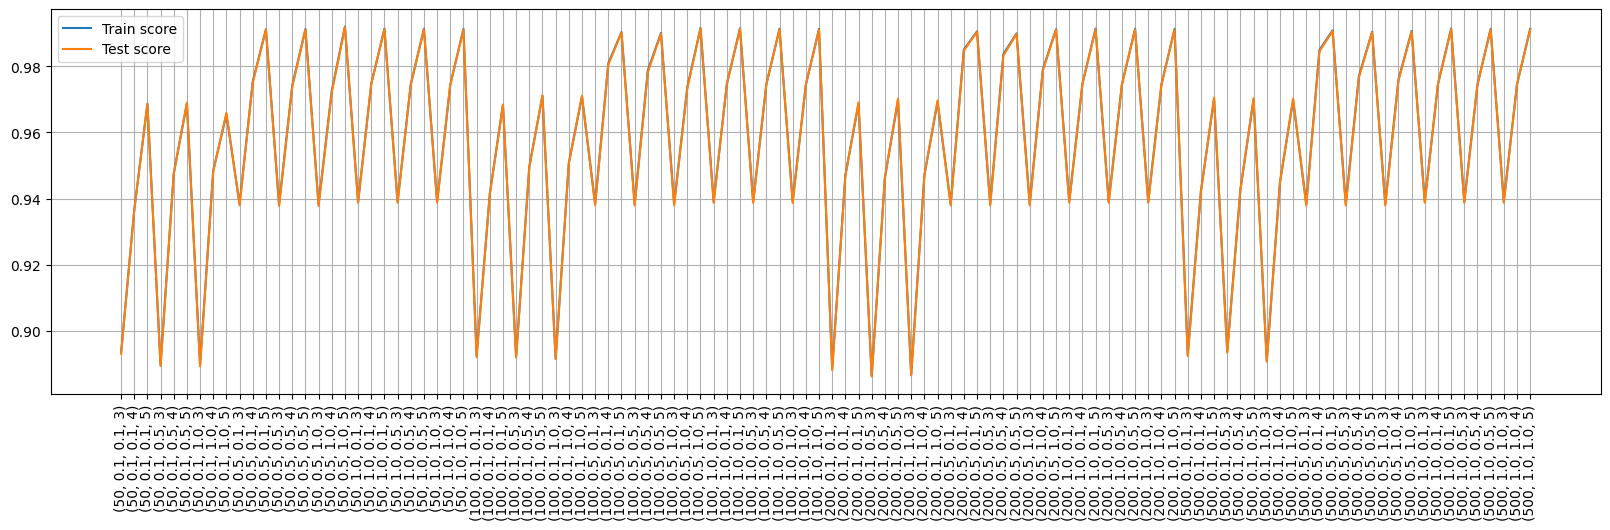

In [ ]:
from sklearn.ensemble import RandomForestClassifier

train = []
test = []
index = []
for n_estimators in [50, 100, 200, 500]:
    for max_features in [0.1, 0.5, 1.]:
        for max_samples in [0.1, 0.5, 1.]:
            for max_depth in [3, 4, 5]:
                rfc = RandomForestClassifier(random_state= 42,
                                             n_estimators = n_estimators,
                                             max_samples= max_samples,
                                             max_features= max_features,
                                             max_depth= max_depth,
                                             n_jobs = -1)
                rfc.fit(X_train, y_train)
                train.append(rfc.score(X_train, y_train))
                test.append(rfc.score(X_test, y_test))
                index.append((n_estimators, max_features,
                              max_samples, max_depth))

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(index)), train, label = 'Train score')
plt.plot(range(len(index)), test, label = 'Test score')
plt.xticks(range(len(index)), index, rotation = 90)
plt.legend()
plt.grid()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state= 0, n_estimators = 50 , max_features = 0.5,
                             max_samples = 0.1,max_depth = 5)
RFC.fit(X_train, y_train)

print(f"Training score of Random Forest: {RFC.score(X_train,y_train):.4f}")
print(f"Testing score of Random Forest: {RFC.score(X_test,y_test):.4f}")

Training score of Random Forest: 0.9911
Testing score of Random Forest: 0.9909


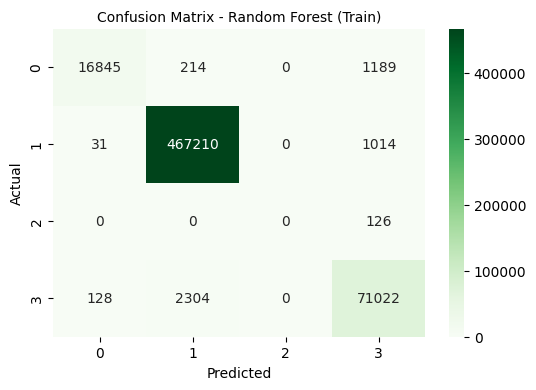

In [ ]:
from sklearn.metrics import confusion_matrix
matrix_train = confusion_matrix(y_train,RFC.predict(X_train))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_train, annot=True, fmt="d", cmap="Greens")

plt.title("Confusion Matrix - Random Forest (Train)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

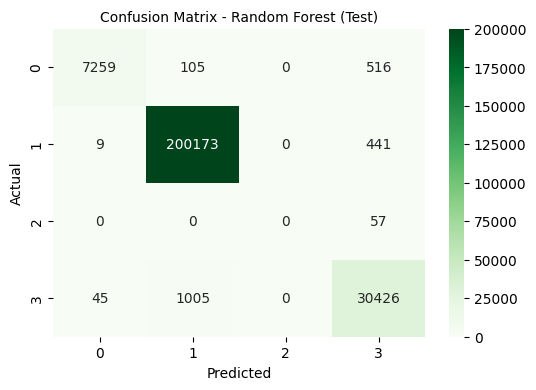

In [ ]:
matrix_test = confusion_matrix(y_test,RFC.predict(X_test))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_test, annot=True, fmt="d", cmap="Greens")

plt.title("Confusion Matrix - Random Forest (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(classification_report(y_test,RFC.predict(X_test)))

              precision    recall  f1-score   support

           1       0.99      0.92      0.96      7880
           2       0.99      1.00      1.00    200623
           3       0.00      0.00      0.00        57
           4       0.97      0.97      0.97     31476

    accuracy                           0.99    240036
   macro avg       0.74      0.72      0.73    240036
weighted avg       0.99      0.99      0.99    240036



In [ ]:
values = RFC.feature_importances_

# Creating a dataframe
Feature_importance = pd.DataFrame({'Feature': X_train.columns ,'Importance': values})

feature_imp = Feature_importance.sort_values('Importance')
feature_imp.tail(30)

,Feature,Importance
24,pipeline-2__BLDG_CLASS_B,0.001589
53,pipeline-2__ZONING_R,0.002053
12,pipeline-1__BLD_FRT,0.002165
40,pipeline-2__BLDG_CLASS_S,0.002502
17,pipeline-1__YRBUILT,0.003288
22,pipeline-1__CURTAXFLAG,0.003398
10,pipeline-1__LOT_FRT,0.003755
21,pipeline-1__GROSS_SQFT,0.004695
74,pipeline-2__CONDO_SFX2_Other,0.007096
2,pipeline-1__CURACTLAND,0.007128


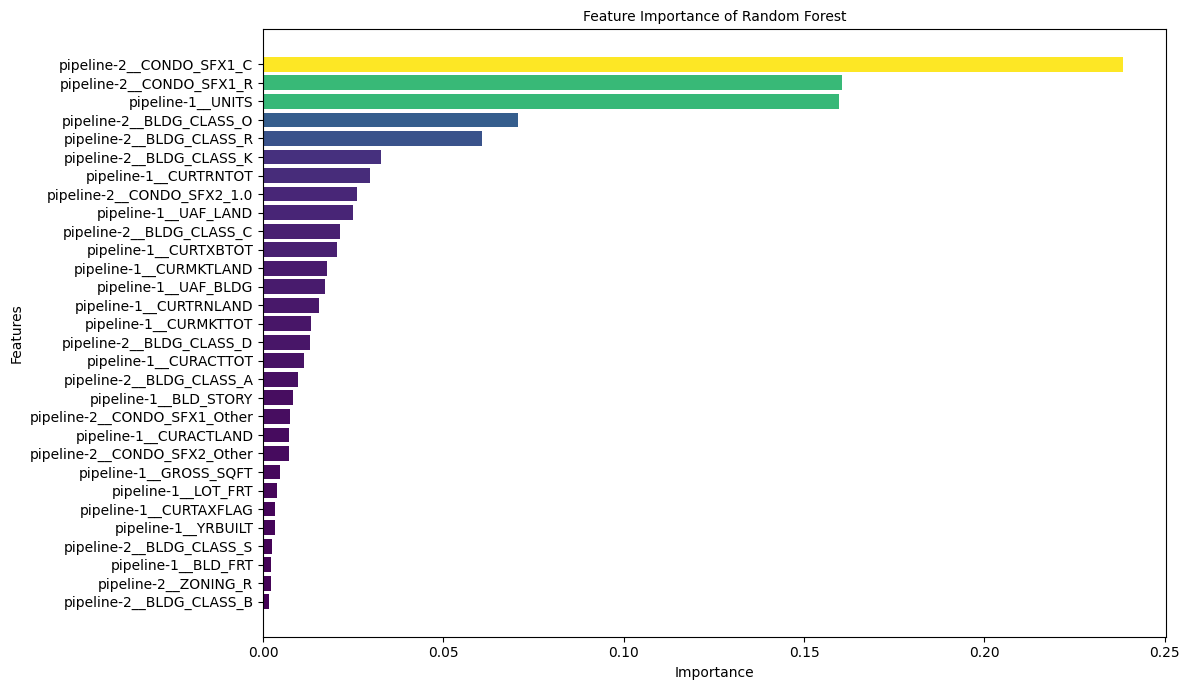

In [ ]:
# Get the top 30 features
df_subset = feature_imp.tail(30)

normalized_importance = df_subset['Importance'] / df_subset['Importance'].max()
colors = cm.get_cmap('viridis')(normalized_importance)

# Create the bar plot
plt.figure(figsize=(12, 7))
plt.barh(df_subset['Feature'], df_subset['Importance'], color = colors)
plt.title("Feature Importance of Random Forest")
plt.ylabel("Features")
plt.xlabel("Importance")
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
target_numeric = pd.factorize(y_train)[0]
correlations = {}

for col in X_train.columns:
    try:
        corr = np.corrcoef(X_train[col], target_numeric)[0, 1]
        correlations[col] = abs(corr)
    except:
        continue  # Skip non-numeric

# Sort and display top correlations
high_corr = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
high_corr[:25]

[('pipeline-2__CONDO_SFX1_C', np.float64(0.59886408253055)),
 ('pipeline-2__CONDO_SFX1_R', np.float64(0.34785256025453676)),
 ('pipeline-2__BLDG_CLASS_O', np.float64(0.3194356600126974)),
 ('pipeline-2__BLDG_CLASS_K', np.float64(0.31122969573560594)),
 ('pipeline-2__BLDG_CLASS_A', np.float64(0.2963712191255812)),
 ('pipeline-2__BLDG_CLASS_B', np.float64(0.25620017859238414)),
 ('pipeline-2__CONDO_SFX2_2.0', np.float64(0.2368869507319173)),
 ('pipeline-2__CONDO_SFX2_3.0', np.float64(0.2344754719399045)),
 ('pipeline-1__CURTAXFLAG', np.float64(0.21920874226575177)),
 ('pipeline-2__CONDO_SFX2_1.0', np.float64(0.18518455896037045)),
 ('pipeline-2__BLDG_CLASS_M', np.float64(0.1803984529576342)),
 ('pipeline-2__ZONING_M', np.float64(0.16056572365889735)),
 ('pipeline-1__CURTRNLAND', np.float64(0.15896048264294485)),
 ('pipeline-2__BLDG_CLASS_H', np.float64(0.15767595391441316)),
 ('pipeline-1__CURTRNTOT', np.float64(0.1561870313040805)),
 ('pipeline-1__CURACTLAND', np.float64(0.1557877727183